In [ ]:
#! pip3 install virtualenv
!pip3 install --user ipykernel

In [15]:
! python -m ipykernel install --user --name=mychurn

Installed kernelspec mychurn in C:\Users\Vlad\AppData\Roaming\jupyter\kernels\mychurn


In [ ]:
#! pip install seaborn
! pip install tensorflow

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout 
import tensorflow as tf
from sklearn.neural_network import MLPClassifier

In [47]:
test = pd.read_csv("data/bank_data_test.csv")
train = pd.read_csv("data/bank_data_train.csv")

https://www.youtube.com/watch?v=_MjMNr-SSFc

## 0. Data overview

In [8]:
test.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,400980,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,525062,0,0.059381,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,NaN
2,280316,0,0.070430,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,496066,0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,375031,0,0.180961,0.0,77.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [12]:
test.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,88798.000000,88798.000000,79198.000000,38520.0,15332.000000,38520.0,38520.0,88798.000000,19282.000000,19282.000000,...,88798.000000,23817.000000,23281.000000,24452.000000,23817.000000,88798.000000,23281.000000,23281.000000,23281.000000,0.0
mean,368993.799601,0.105948,0.044540,0.0,51.234151,0.0,0.0,0.001395,0.417814,0.415055,...,0.007159,0.053328,0.025664,0.050934,0.009531,0.004479,0.013860,0.013860,0.013860,NaN
std,128247.549453,0.433893,0.110796,0.0,21.545330,0.0,0.0,0.030099,0.315638,0.337138,...,0.065267,0.212901,0.114417,0.187097,0.094423,0.061463,0.096474,0.096474,0.096474,NaN
min,146849.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.010204,0.000169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,257792.000000,0.000000,0.000000,0.0,34.000000,0.0,0.0,0.000000,0.166667,0.141839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,369065.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.288088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,480225.000000,0.000000,0.037049,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.655653,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,590827.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [23]:
test.isnull().sum()

ID                              0
CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC           9600
PRC_ACCEPTS_A_EMAIL_LINK    50278
APP_REGISTR_RGN_CODE        73466
                            ...  
TURNOVER_DYNAMIC_CC_3M          0
LDEAL_ACT_DAYS_PCT_TR       65517
LDEAL_ACT_DAYS_PCT_TR4      65517
LDEAL_ACT_DAYS_PCT_CURR     65517
TARGET                      88798
Length: 116, dtype: int64

too many NULLs

In [23]:
train['TARGET'].value_counts()

0    326265
1     28925
Name: TARGET, dtype: int64

classes are imbalanced

## 1. Data preparation

In [48]:
train['train'] = 1
test['train'] = 0
df = pd.concat([train, test], ignore_index=True)
df_b = df.copy()
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET,train
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1


In [28]:
df.dtypes.value_counts()

float64    95
object     13
int64       8
dtype: int64

In [49]:
# optimize memory by type casting
def optimize_memory(df):
    before, after = 0, 0
    for i in df.columns:
        before = before + df[i].memory_usage()
        if 'float64' == df[i].dtype or  'float32' == df[i].dtype:
            df[i] = df[i].astype('float16')
        if 'int64' == df[i].dtype or 'int32' == df[i].dtype:
            df[i] = df[i].astype('int16')
        after = after + df[i].memory_usage()

    before, after = before / 1024**2, after / 1024**2
    print("Before:\t{:.2f} Mb\nAfter:\t{:.2f} Mb".format(before, after))
    return df

df = optimize_memory(df)

Before:	396.34 Mb
After:	132.12 Mb


In [105]:
df.select_dtypes(include =['object']).isnull().sum()

CLNT_TRUST_RELATION            357070
APP_MARITAL_STATUS             358546
APP_KIND_OF_PROP_HABITATION    369645
CLNT_JOB_POSITION_TYPE         387905
CLNT_JOB_POSITION              180325
APP_DRIVING_LICENSE            372211
APP_EDUCATION                  358696
APP_TRAVEL_PASS                372211
APP_CAR                        372212
APP_POSITION_TYPE              368188
APP_EMP_TYPE                   359625
APP_COMP_TYPE                  359625
PACK                                0
dtype: int64

In [50]:
# exclude varaibles with too much missings
for i in df.columns:
    if df[i].isnull().sum() > 100000:
        df.drop(i, axis=1, inplace=True)

In [51]:
# exclude all object types, now we have df only with number types
df = pd.concat([df, pd.get_dummies(df['PACK'])], axis = 1)
df.drop(['PACK'], axis=1, inplace=True)
df.dtypes.value_counts()

float16    35
uint8      12
int16       9
dtype: int64

Text(0.5, 1.0, 'After')

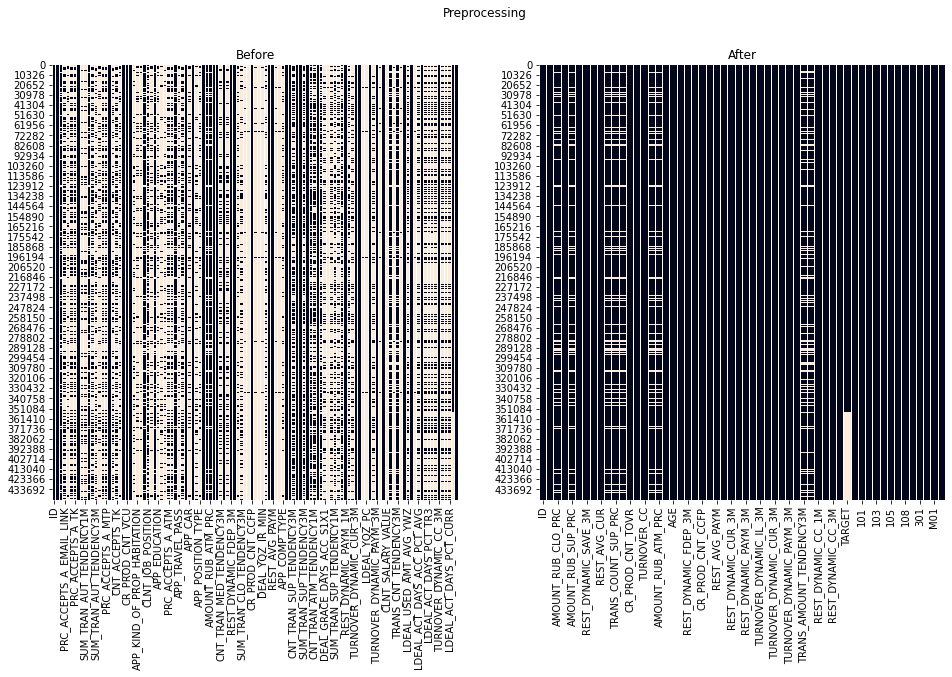

<Figure size 432x288 with 0 Axes>

In [8]:
# comparison of heatmaps to see number of omissions
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
figure() # change sides of plot
sns.heatmap(df_b.isnull(), cbar=False, ax=axs[0])
sns.heatmap(df.isnull(), cbar=False, ax=axs[1])
fig.suptitle('Preprocessing')
axs[0].set_title('Before')
axs[1].set_title('After')

In [52]:
# divide train and test
df = df[np.isfinite(df).all(1)]
df_train = df[df['train']==1].copy() # could be done with target
df_test = df[df['train']==0].copy()
df_train.dropna(how = 'any', inplace=True)

In [53]:
X = df_train.drop(['ID', 'TARGET', 'train'], axis=1).values.astype('float16')
y = df_train["TARGET"].values


In [54]:
tomek=TomekLinks()
x_res, y_res = tomek.fit_resample(X, y)
joblib.dump(x_res, 'save/x_res.pkl')
joblib.dump(y_res, 'save/y_res.pkl')

In [57]:
x_res = joblib.load("save/x_res.pkl")
y_res = joblib.load("save/y_res.pkl")


In [116]:
print(Counter(y))
print(Counter(y_res))


Counter({0.0: 192791, 1.0: 22044})
Counter({0.0: 181196, 1.0: 22044})


In [127]:
x_res.shape, y_res.shape

((203240, 53), (203240,))

In [58]:
#You need to make a split on the train and test (20%) datasets with stratification.
X, y = x_res, y_res
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc


## 2. Models

### 2.1. Baseline naive classifier

In [71]:
m1 = BernoulliNB(binarize=5)
m1.fit(X_train, y_train)
y_hat_class1 = m1.predict(X_test)
y_hat_proba1 = m1.predict_proba(X_test)[:, 1]




In [79]:
print('accuracy:', round(accuracy_score(y_test, y_hat_class1), 2))
print('auc\t:', round(roc_auc_score(y_test, y_hat_class1), 2))
results = []
results.append({'model': 'm1', 'auc' : round(roc_auc_score(y_test, y_hat_class1), 2)})



accuracy: 0.88
auc	: 0.51


Text(0.5, 1.0, 'Probability')

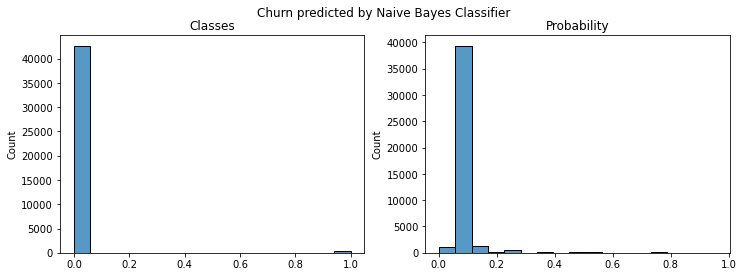

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_hat_class, ax=axs[0])
sns.histplot(x=y_hat_proba, ax=axs[1])
fig.suptitle('Churn predicted by Naive Bayes Classifier')
axs[0].set_title('Classes')
axs[1].set_title('Probability')

### 2.2. Random forest

In [33]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500], # number fo trees in the forest and ??
    'max_features': ['auto'], #  size of the random subsets of features to consider when splitting a node
    'max_depth': [2, 10, 16], # The maximum depth of the tree
    'criterion': ['gini', 'entropy'], # The function to measure the quality of a split. 
                                    # (Gini impurity or SChannon information gain)
    'class_weight': ['balanced'] # weights of y = n_samples / (n_classes * np.bincount(y))
}
gs_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, 
    cv=5, # cross-validation splitter
    verbose=1, # the computation time for each fold and parameter candidate is displayed;
    n_jobs=-1 # all cores available on the machine are used
)

gs_rfc.fit(X_train, y_train)
joblib.dump(gs_rfc, 'save/gs_rfc.pkl')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 16], 'max_features': ['auto'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [83]:
gs_rfc = joblib.load("save/gs_rfc.pkl")
bp = gs_rfc.best_params_
m2 = RandomForestClassifier(random_state=42,
    n_estimators = bp['n_estimators'], 
    max_features =  bp['max_features'], 
    max_depth = bp['max_depth'], 
    criterion = bp['criterion'], 
    class_weight = bp['class_weight'])
m2

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       max_features='auto', n_estimators=500, random_state=42)

In [84]:
m2.fit(X_train, y_train)
y_hat_class2 = m2.predict(X_test)
y_hat_proba2 = m2.predict_proba(X_test)[:, 1]

c:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [85]:
print('accuracy:', round(accuracy_score(y_test, y_hat_class2), 2))
print('auc\t:', round(roc_auc_score(y_test, y_hat_class2), 2))
results.append({'model': 'm2', 'auc' : round(roc_auc_score(y_test, y_hat_class2), 2)})

accuracy: 0.83
auc	: 0.67


Text(0.5, 1.0, 'Probability')

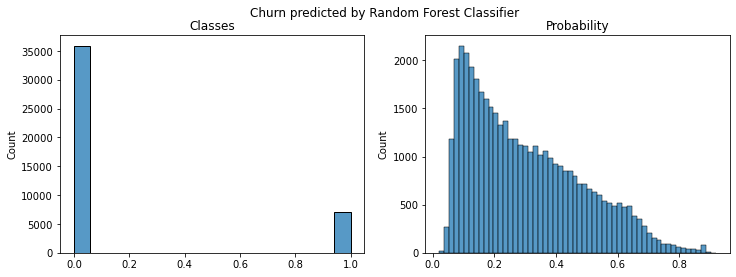

In [72]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_hat_class2, ax=axs[0])
sns.histplot(x=y_hat_proba2, ax=axs[1])
fig.suptitle('Churn predicted by Random Forest Classifier')
axs[0].set_title('Classes')
axs[1].set_title('Probability')

### 2.3. Scikit-learn

Multi-layer Perceptron classifier.

In [69]:
mlpc = MLPClassifier(random_state=42)

param_grid = {
    'solver': ['adam'],
    'max_iter': [200, 300], #  
    'activation': ['relu', 'logistic'], # 
    'hidden_layer_sizes': [(62, 32, 1)]
}
gs_mlpc = GridSearchCV(estimator=mlpc, param_grid=param_grid, 
    cv=5, # cross-validation splitter
    verbose=1, # the computation time for each fold and parameter candidate is displayed;
    n_jobs=-1 # all cores available on the machine are used
)
gs_mlpc.fit(X_train, y_train)
joblib.dump(gs_mlpc, 'save/gs_mlpc.pkl')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['save/gs_mlpc.pkl']

In [90]:
gs_mlpc = joblib.load("save/gs_mlpc.pkl")
bp = gs_mlpc.best_params_
m3 = MLPClassifier(random_state=42,
    solver = 'adam', #bp['solver'], 
    max_iter =  bp['max_iter'], 
    activation = bp['activation'], 
    hidden_layer_sizes = bp['hidden_layer_sizes'])
m3

MLPClassifier(hidden_layer_sizes=(62, 32, 1), random_state=42)

In [91]:
m3.fit(X_train, y_train)
y_hat_class3 = m3.predict(X_test)
y_hat_proba3 = m3.predict_proba(X_test)[:, 1]
print('accuracy:', round(accuracy_score(y_test, y_hat_class3), 2))
print('auc\t:', round(roc_auc_score(y_test, y_hat_class3), 2))
results.append({'model': 'm3', 'auc' : round(roc_auc_score(y_test, y_hat_class3), 2)})

c:\Users\Vladimir\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.89
auc	: 0.54


In [84]:
print(Counter(y_hat_class3))

Counter({0.0: 42078, 1.0: 889})


Text(0.5, 1.0, 'Probability')

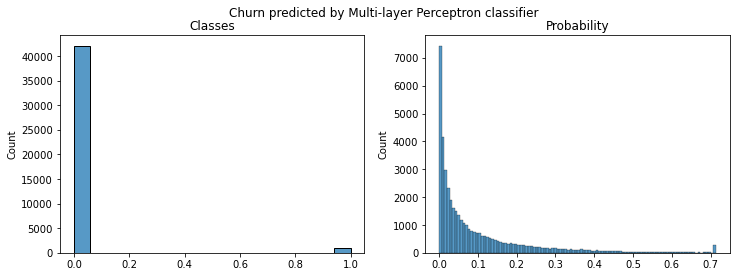

In [85]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_hat_class3, ax=axs[0])
sns.histplot(x=y_hat_proba3, ax=axs[1])
fig.suptitle('Churn predicted by Multi-layer Perceptron classifier')
axs[0].set_title('Classes')
axs[1].set_title('Probability')

### 2.4. Keras

In [93]:
m4 = Sequential()
m4.add(Dense(128, input_shape=(X_train.shape[1], ), activation='relu'))
m4.add(Dropout(0.75))
m4.add(Dense(64, activation='relu'))
m4.add(Dropout(0.75))
m4.add(Dense(32, activation='relu'))
m4.add(Dense(1, activation='sigmoid'))
m4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
history = m4.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
5081/5081 [==============================] - 12s 2ms/step - loss: 0.3478 - auc: 0.6121
Epoch 2/50
5081/5081 [==============================] - 10s 2ms/step - loss: 0.3256 - auc: 0.6777
Epoch 3/50
5081/5081 [==============================] - 11s 2ms/step - loss: 0.3208 - auc: 0.6994
Epoch 4/50
5081/5081 [==============================] - 11s 2ms/step - loss: 0.3176 - auc: 0.7088
Epoch 5/50
5081/5081 [==============================] - 10s 2ms/step - loss: 0.3151 - auc: 0.7184
Epoch 6/50
5081/5081 [==============================] - 10s 2ms/step - loss: 0.3129 - auc: 0.7256
Epoch 7/50
5081/5081 [==============================] - 10s 2ms/step - loss: 0.3118 - auc: 0.7285
Epoch 8/50
5081/5081 [==============================] - 10s 2ms/step - loss: 0.3105 - auc: 0.7325
Epoch 9/50
5081/5081 [==============================] - 11s 2ms/step - loss: 0.3101 - auc: 0.7338
Epoch 10/50
5081/5081 [==============================] - 10s 2ms/step - loss: 0.3091 - auc: 0.7376
Epoch 11/50
5081/50

In [94]:
y_hat_proba4 = m4.predict(X_test)
y_hat_class4 = [int(x >= 0.5) for x in y_hat_proba4]
print('accuracy:', round(accuracy_score(y_test, y_hat_class4), 2))
print('auc\t:', round(roc_auc_score(y_test, y_hat_class4), 2)) # too small!!
results.append({'model': 'm4', 'auc' : round(roc_auc_score(y_test, y_hat_class4), 2)})

1271/1271 [==============================] - 1s 1ms/step
accuracy: 0.89
auc	: 0.5


Text(0.5, 1.0, 'Probability')

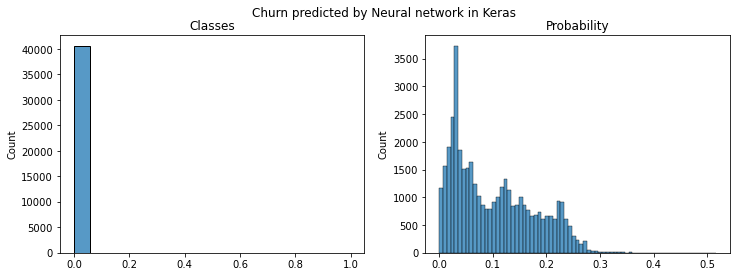

In [147]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_hat_class4, ax=axs[0])
sns.histplot(x=y_hat_proba4[:, 0], ax=axs[1])
fig.suptitle('Churn predicted by Neural network in Keras')
axs[0].set_title('Classes')
axs[1].set_title('Probability')

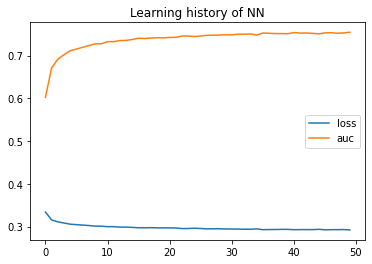

In [34]:
plt.title('Learning history of NN')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['auc'], label='auc')
plt.legend()
plt.show()

### 2.5. TensorFlow

In [97]:
m5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
m5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
            metrics=tf.keras.metrics.AUC())
history = m5.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
2541/2541 [==============================] - 6s 2ms/step - loss: 0.3411 - auc_2: 0.6170
Epoch 2/10
2541/2541 [==============================] - 7s 3ms/step - loss: 0.3336 - auc_2: 0.6407
Epoch 3/10
2541/2541 [==============================] - 8s 3ms/step - loss: 0.3342 - auc_2: 0.6378
Epoch 4/10
2541/2541 [==============================] - 8s 3ms/step - loss: 0.3315 - auc_2: 0.6497
Epoch 5/10
2541/2541 [==============================] - 7s 3ms/step - loss: 0.3325 - auc_2: 0.6468
Epoch 6/10
2541/2541 [==============================] - 7s 3ms/step - loss: 0.3303 - auc_2: 0.6536
Epoch 7/10
2541/2541 [==============================] - 7s 3ms/step - loss: 0.3301 - auc_2: 0.6538
Epoch 8/10
2541/2541 [==============================] - 6s 2ms/step - loss: 0.3310 - auc_2: 0.6475
Epoch 9/10
2541/2541 [==============================] - 5s 2ms/step - loss: 0.3298 - auc_2: 0.6545
Epoch 10/10
2541/2541 [==============================] - 5s 2ms/step - loss: 0.3297 - auc_2: 0.6556


In [153]:
y_hat_proba5 = m5.predict(X_test)
y_hat_class5 = [int(x >= 0.5) for x in y_hat_proba5]
print('accuracy:', round(accuracy_score(y_test, y_hat_class5), 2))
print('auc\t:', round(roc_auc_score(y_test, y_hat_class5), 2)) # too small!!
results.append({'model': 'm5', 'auc' : round(roc_auc_score(y_test, y_hat_class5), 2)})

1271/1271 [==============================] - 2s 2ms/step
accuracy: 0.89
auc	: 0.5


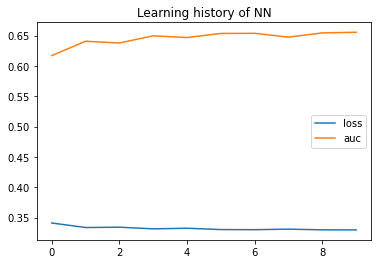

In [104]:
plt.title('Learning history of NN')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['auc_2'], label='auc')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Probability')

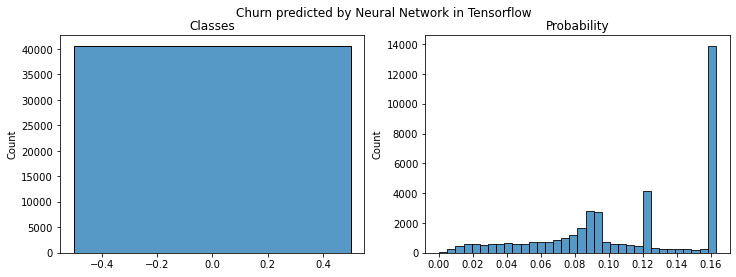

In [148]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(x=y_hat_class5, ax=axs[0])
sns.histplot(x=y_hat_proba5[:, 0], ax=axs[1])
fig.suptitle('Churn predicted by Neural Network in Tensorflow')
axs[0].set_title('Classes')
axs[1].set_title('Probability')

### 2.6. NumPy

In [ ]:
class DNN():
    def __init__(self, input_size, output_size, hidden_dims, initializer='random', activation = 'relu'):
        
        self.layer_dims=[input_size] + hidden_dims + [output_size]
        self.w = {}
        self.b = {}
        self.activation = activation
        self.initializer = initializer
        self.L = len(self.layer_dims)-1

        for i in range(self.L):
            self.w[i+1]=np.random.randn(self.layer_dims[i+1], self.layer_dims[i])
            self.b[i+1]=np.zeroes((self.layer_dims[i+1], 1))

        def linear(self, X):
            return X

        def linear_grad(self, X):
            return np.ones(shape=X.shape)
        
        def sigmoid(self, X):
            return 1/(1+np.exp(-X))

        def sigmoid_grad(self, X):
            return self.sigmoid(X)*(1-self.sigmoid(X))
        
        def relu(self, X):
            return np.maximum(0, X)
        def relu_grad(self, X):
            return 1.0*(X > 0)

        def accuracy(self, y_pred, y_true):
            a = np.argmax(y_pred, axis=0)
            b = np.argmax(y_true, axis=0)
            correct = np.sum((a==b)*1)
            total = a.size
            return correct/total

        def forward_propagation(self, X):
            self.z = {}
            self.a = {}
            self.a[0] = X
            ll = len(self.layer_dims)-2
            for i in range(ll):
                self.z[i+1] = np.matmul(self.w[i+1], self.a[i]) + self.b[i+1]
            self.z[self.L] = np.matmul(self.w[self.l], self.a[ll]) + self.b[self.l]
            self.a[self.L] = self.sigmoid(self.z[self.l])
            return self.a
        
        def backpropagation(self, Y):
            self.dz = {}
            self.da = {}
            self.dw = {}
            self.db = {}
            self.dz[self.L] = self.a[self.L] - Y
            for i in range(self.L, 0, -1):
                self.dw[i] = (1/self.dz[i].shape[1]) * np.matmul(self.dz[i], self.a[i-1].T)
                self.db[i] = (1/self.dz[i].shape[1]) * np.sum(self.dz[i], axis=1, keepdims=True)
        return (self.dw, self.db)

        def train(self, X_train, y_train, X_test, y_test, epochs=100, lr = 0.001):
            self.mw = {}
            self.mb = {}
            self.vw = {}
            self.vb = {}
            for i in range(self.L):
                self.mw[i+1] = np.zeros(shape=self.w[i+1].shape)
                self.mb[i+1] = np.zeros(shape=self.b[i+1].shape)
                self.vw[i+1] = np.zeros(shape=self.w[i+1].shape)
                self.vb[i+1] = np.zeros(shape=self.b[i+1].shape)

            train_cost = []
            test_cose = []
            train_cost = []
            test_acc = []

            for epoch in range(epochs):
                meth = np.random.permutation(X.train.shape[1])
                X_train = X_train[:, meth]

        
        def predict(self, X):
            a = self.forward_propagation(X)
            return a[self.L]
    



## 3. Results

In [155]:
pd.DataFrame(results)

,model,auc
0,m1,0.51
1,m2,0.67
2,m3,0.54
3,m4,0.50
4,m5,0.50
